In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
from pyswarms.utils.plotters.formatters import Mesher

options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=100)

2023-04-24 11:06:46,164 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=7.13e-9
2023-04-24 11:06:46,351 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.127788157641578e-09, best pos: [1.07173658e-05 8.37432160e-05]


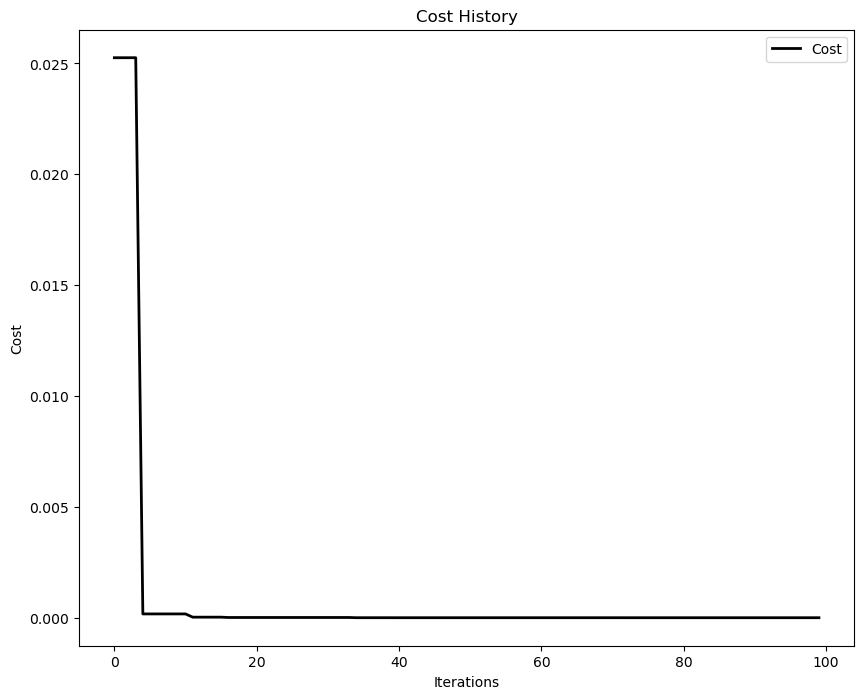

In [2]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

2023-04-24 11:06:49,760 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-04-24 11:06:49,768 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


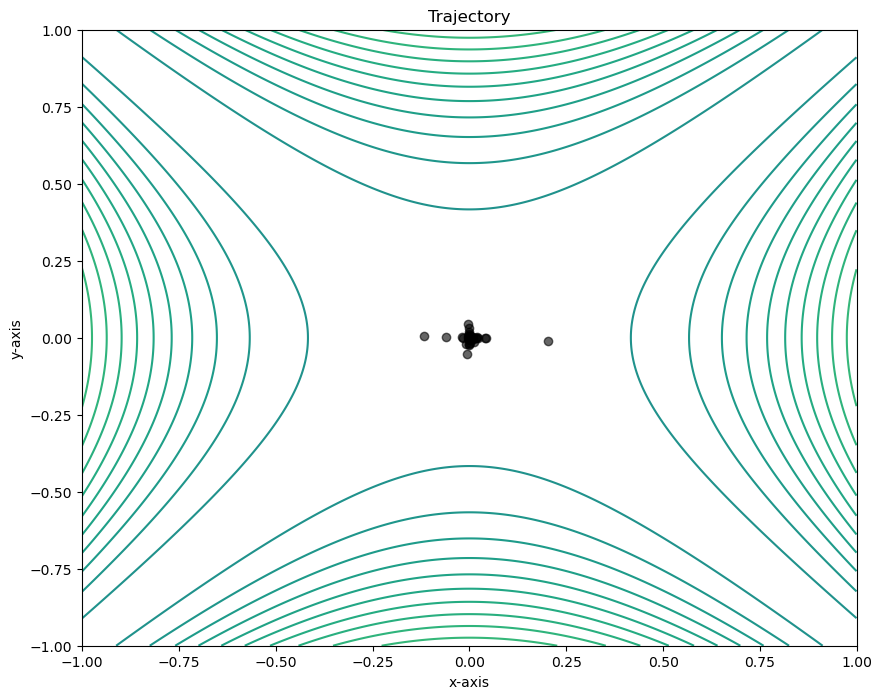

In [3]:
m = Mesher(func=fx.schaffer2)

animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

# Enables us to view it in a Jupyter notebook
animation.save('plot0.gif', writer='imagemagick', fps=10)
Image(url='plot0.gif')

2023-04-24 11:08:58,969 - matplotlib.animation - WARNING - MovieWriter imagemagick unavailable; using Pillow instead.
2023-04-24 11:08:58,973 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


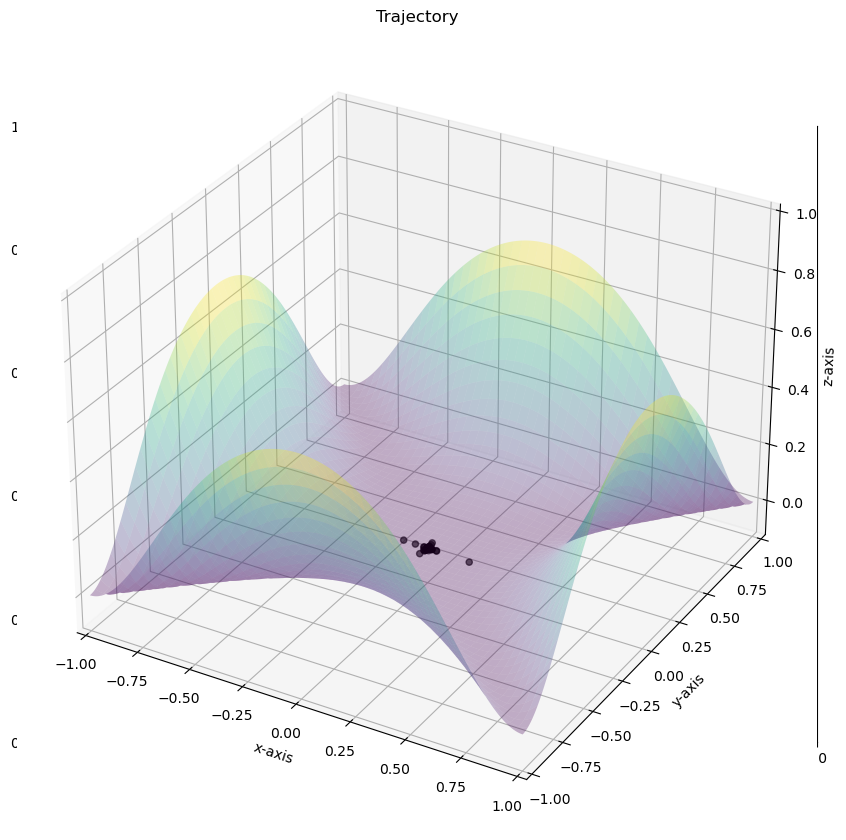

In [5]:
# Obtain a position-fitness matrix using the Mesher.compute_history_3d()
# method. It requires a cost history obtainable from the optimizer class
# https://pyswarms.readthedocs.io/en/latest/api/pyswarms.utils.functions.html#module-pyswarms.utils.functions.single_obj
pos_history_3d = m.compute_history_3d(optimizer.pos_history)
# Make a designer and set the x,y,z limits to (-1,1), (-1,1) and (-0.1,1) respectively
from pyswarms.utils.plotters.formatters import Designer
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)], label=['x-axis', 'y-axis', 'z-axis'])
# Make animation
animation3d = plot_surface(pos_history=pos_history_3d, # Use the cost_history we computed
                           mesher=m, designer=d,       # Customizations
                           mark=(0,0,0))   # Mark minima
animation3d.save('plot1.gif', writer='imagemagick', fps=10)
Image(url='plot1.gif')